# Workdir

In [1]:
workdir = '/home/97n/simulations/ARCS/Si/singlextal-diffraction-2/'

In [2]:
!mkdir -p {workdir}
%cd {workdir}

/home/97n/simulations/ARCS/Si/singlextal-diffraction-2


# Tools

In [3]:
import tqdm

In [4]:
from matplotlib import pyplot as plt
import numpy as np, os
import histogram.hdf as hh, histogram as H

/home/97n/miniconda3/envs/mcvine-py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [44]:
%matplotlib notebook
# %matplotlib inline

# Sample spec

In [5]:
cd {workdir}

/home/97n/simulations/ARCS/Si/singlextal-diffraction-2


In [7]:
%%file Si.yml
name: Si
chemical_formula: Si #
lattice: 
 constants: 5.431, 5.431, 5.431, 90, 90, 90
 basis_vectors:
  - 5.431, 0, 0
  - 0, 5.431, 0
  - 0, 0, 5.431
excitation:
 type: singlecrystal_diffraction
 Dd_over_d: 1.e-4
 mosaic: 5./60*deg
 lau_path: Si.lau
orientation:
 u: 1, 1, 0
 v: 0, 0, 1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 300*K

Writing Si.yml


In [8]:
!cp /home/97n/dv/mcvine/mcvine/packages/mccomponents/tests/mccomponents/sample/diffraction/Si.cif .
!cp /home/97n/dv/mcvine/mcvine/packages/mccomponents/tests/mccomponents/sample/diffraction/Si.lau .

# Workflow

In [29]:
cd {workdir}

/home/97n/simulations/ARCS/Si/singlextal-diffraction-2


In [30]:
rm -rf sim/

In [31]:
!mcvine workflow singlecrystal --instrument=arcs --sample=Si.yml --outdir=sim --type=DGS

/home/97n/miniconda3/envs/mcvine-py36/lib/python3.6/site-packages/mcvine/workflow/sampleassembly/scaffolding/sampleassembly_xml.py:22: UserWarning: assume average temperature
  warnings.warn("assume average temperature")


# Fine tune sample

In [51]:
cd {workdir}

/home/97n/simulations/ARCS/Si/singlextal-diffraction-2


In [32]:
ls sim/sampleassembly/

sampleassembly.xml  Si-scatterer.xml  Si.xyz


In [52]:
!cp Si.cif sim/sampleassembly/
!cp Si.lau sim/sampleassembly/

In [33]:
%%file sim/sampleassembly/sampleassembly.xml
<?xml version="1.0"?>

<!DOCTYPE SampleAssembly>

<SampleAssembly name="X"
   max_multiplescattering_loops_among_scatterers="1"
   max_multiplescattering_loops_interactM_path1="4"
   min_neutron_probability=".1"
 >

  <PowderSample name="Si" type="sample">
    <Shape>
      <hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch" />
    </Shape>
    <Phase type="crystal">
      <ChemicalFormula>Si</ChemicalFormula>
      <ciffile>Si.cif</ciffile>
    </Phase>
  </PowderSample>

  <LocalGeometer registry-coordinate-system="InstrumentScientist">
    <Register name="Si" position="(0,0,0)" orientation="(0, 0, 0)"/>
  </LocalGeometer>

  <Environment temperature="300*K"/>

</SampleAssembly>

Overwriting sim/sampleassembly/sampleassembly.xml


In [34]:
cat sim/sampleassembly/Si-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  packing_factor="1.0"
  >
  
  <KernelContainer average="yes">


    <!-- a simple kernel for elastic scattering. more realistic kernel exists. -->
    <E_Q_Kernel 
	E_Q="1" 
	S_Q="1"
	Qmin="0./angstrom"
	Qmax="16./angstrom"
	/>


      <SingleCrystalDiffractionKernel
        weight="1."
        orientation="-0.0,0.0,1.0000000000000002,0.7071067811865476,-0.7071067811865476,0.0,0.7071067811865476,0.7071067811865476,0.0"
        Dd_over_d="0.0001"
        lau_path="Si.lau"
        mosaic="5./60*deg"
      >
      </SingleCrystalDiffractionKernel>

    
  </KernelContainer>
  
</homogeneous_scatterer>


In [35]:
%%file sim/sampleassembly/Si-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  packing_factor="1.0"
  >
  
  <KernelContainer average="no">

    <Phonon_IncoherentElastic_Kernel dw_core='0.*angstrom**2'>
    </Phonon_IncoherentElastic_Kernel>
    
    <SingleCrystalDiffractionKernel
        weight="1."        
        orientation="-0.0,0.0,1.0000000000000002,0.7071067811865476,-0.7071067811865476,0.0,0.7071067811865476,0.7071067811865476,0.0"
        Dd_over_d="0.0001"
        lau-path="Si.lau"
        mosaic="5./60*deg"
    >
    </SingleCrystalDiffractionKernel>
    
  </KernelContainer>
  
</homogeneous_scatterer>

Overwriting sim/sampleassembly/Si-scatterer.xml


# Beam sim

In [36]:
cd {workdir}/sim/beam

/home/97n/simulations/ARCS/Si/singlextal-diffraction-2/sim/beam


In [37]:
!rm -rf *

In [38]:
%%file run-beam.sh
#!/usr/bin/env bash
#
mcvine instruments arcs beam --keep-in-cache --use-cache \
    --ncount=1e9 --nodes=40 --E=100.

Writing run-beam.sh


In [39]:
!chmod +x run-beam.sh

5min

In [40]:
%%time
! ./run-beam.sh >log.run 2>&1

CPU times: user 0 ns, sys: 7.31 ms, total: 7.31 ms
Wall time: 340 ms


## Check

In [41]:
ls out

ienergy.h5  ix_divy.h5  iy_divy.h5            neutrons
itof.h5     ix_y.h5     mon1-itof-focused.h5  props.json
ix_divx.h5  iy_divx.h5  mon2-itof-focused.h5  rank0-step0/


<IPython.core.display.Javascript object>


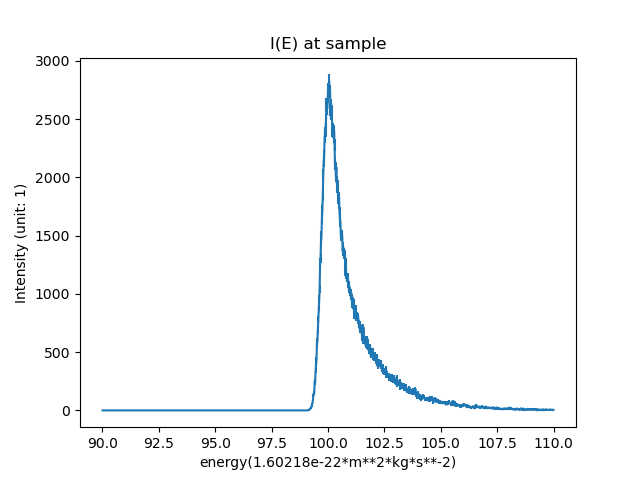

In [45]:
H.plot(hh.load('out/ienergy.h5'))

# Scattering

In [53]:
cd {workdir}/sim/scattering

/home/97n/simulations/ARCS/Si/singlextal-diffraction-2/sim/scattering


In [23]:
ls

scripts/  sim.yml  template/


## Customize sim

In [47]:
%%file sim.yml
cluster:
  nodes: 40
instrument:
  name: arcs
scatter:
  ncount: 1e7
  buffer_size: 0
  multiple_scattering: off
  template: ./template

Overwriting sim.yml


## Try one angle

In [54]:
rm -rf work_-160.55/

In [69]:
%%time
! ./scripts/sim.py --angle=-160.55

ln -s ../../beam
ln -s ../../sampleassembly
NCOUNT=1e7 BUFFER_SIZE=0 NODES=40 SAMPLE_ANGLE=-160.55 ./scatter </dev/null >log.scatter 2>&1
INSTRUMENT=arcs NODES=40 SAMPLE_ANGLE=-160.55 time ./create-nxs >log.create-nxs 2>&1
CPU times: user 549 ms, sys: 89.4 ms, total: 639 ms
Wall time: 1min 25s


In [70]:
ls work_-160.55/*.nxs

work_-160.55/sim_-160.55_no_metadata.nxs
work_-160.55/sim_-160.55.nxs
work_-160.55/sim_-160.55-with-monitors.nxs


## Run all angles

In [72]:
psi_angles = [-160.55, -116.97, -83.24, -175.22, 152.54]

In [58]:
%%file create-run.py
import numpy as np
ostream = open('run.sh', 'wt')
for a in [-83.24, -175.22, 152.54]:
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

Writing create-run.py


In [60]:
!python create-run.py

In [61]:
!chmod +x run.sh

In [62]:
cat run.sh

./scripts/sim.py --angle=-83.24 
./scripts/sim.py --angle=-175.22 
./scripts/sim.py --angle=152.54 


In [63]:
# rm -rf work_*

In [64]:
%%time
!./run.sh >log.run

CPU times: user 1.54 s, sys: 190 ms, total: 1.73 s
Wall time: 4min 10s


### Add psi log

In [65]:
from mantid import simpleapi as msa

In [73]:
nxsfiles = ['work_{}/sim_{}.nxs'.format(a, a) for a in psi_angles]

In [74]:
nxsfiles_withpsi = []
for a, f in tqdm.tqdm(zip(psi_angles, nxsfiles)):
    ws = msa.Load(f)
    msa.AddSampleLog(ws, LogName='omega', LogText=str(a), LogType='Number')
    # assert('omega' in ws.getRun().keys())
    bn, ext = os.path.splitext(f)
    fo = os.path.abspath('sim_{}-with_psi.nxs'.format(a))
    msa.SaveNexus(ws, FileName=fo)
    assert os.path.exists(fo)
    nxsfiles_withpsi.append(fo)
    continue

5it [00:02,  1.86it/s]


In [75]:
pwd

'/home/97n/simulations/ARCS/Si/singlextal-diffraction-2/sim/scattering'